# Fordgobike Dataset Exploration
## by (Yasser El Sawaf)

## Preliminary Wrangling

This is an analysis of bike share system  ,contains almost 180k datapoints of bike trips.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#loading the dataset
fordbike = pd.read_csv("201902-fordgobike-tripdata.csv")
df  = fordbike.copy()
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Data cleaning

In [6]:
#dropping data points that doesnt have gender or birthyear
df.drop(df[df.member_gender.isna()].index , inplace=True)
df.shape[0]

175147

In [7]:
#change member_birth_year data type from float to int 
df.member_birth_year = df.member_birth_year.astype('int')

In [8]:
#chaning start and end time type to date time
df.start_time = pd.to_datetime(df.start_time , format= '%Y-%m-%d %H:%M:%S')
df.end_time = pd.to_datetime(df.end_time , format= '%Y-%m-%d %H:%M:%S')

In [9]:
#making gender a categorical type
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ['Male','Female','Other'])
df.member_gender = df.member_gender.astype(ordered_var)
df.member_gender.dtype

CategoricalDtype(categories=['Male', 'Female', 'Other'], ordered=True)

In [10]:
#making uder-type  a categorical type
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ['Customer','Subscriber'])
df.user_type= df.user_type.astype(ordered_var)
df.user_type.dtype

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=True)

In [11]:
#chaning duration_sec column to duration_min for better readablity 
df['duration_min'] = df.duration_sec /60
df['duration_min'] = df['duration_min'].apply(lambda x : round(x)).astype('int')

In [12]:
#using only the columns of useful for the analysis
df = df [['duration_min', 'start_time', 'end_time', 'start_station_id', 'end_station_id', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender']]
df.head(1)

,duration_min,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender
0,870,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,13.0,4902,Customer,1984,Male


### What is the structure of your dataset?

 This dataset contains 175147 data points after cleaning , its has these features ( ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'] )  , it has numer features like duration , member_birthyear ... etc  and categorical features like:
- user_type: customer/subscriber
- gender : male /female /other

### What is/are the main feature(s) of interest in your dataset?

> Im interested in the features affecting the trip duration .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think features like user_type will affect the trip duration , I also want to know if the avarege trip duration will be different for different genders or different user types or differnt days of the week.

## Univariate Exploration


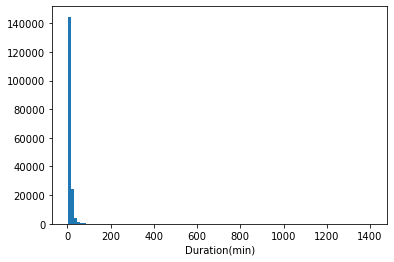

In [13]:
#let take a look at the duration_min column
bins = 100
plt.hist(data = df , x = 'duration_min' , bins = bins);
plt.xlabel('Duration(min)');

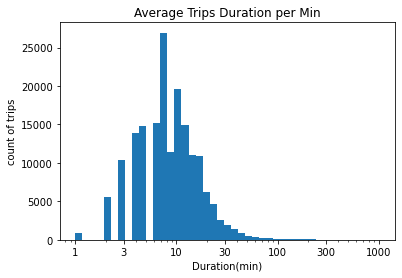

In [20]:
# lets use a log scale  in instead  for better understanding
bins = 10**np.arange(0 , 3 + 0.07 , 0.07)
xticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
xlabels = ['{}'.format(v) for v in xticks]
plt.hist(data = df , x = 'duration_min' , bins = bins );
plt.xscale('log');
plt.xticks(xticks,xlabels);
plt.xlabel('Duration(min)');
plt.ylabel('count of trips');
plt.title('Average Trips Duration per Min');
    

The distribution plotted on log scaale is alomst unimodel and skewed to the right ,  it shows that the average trip durations peaks around 10 mins (which make sense for bike trips ) , there are few outliers that lies  above 200 mins . 

In [ ]:
#Lets take a look on the user_type and gender_type 
fig, ax = plt.subplots(ncols = 2, figsize = [15,5])
default_color = sb.color_palette()[0]
# subplot 1: use_type
sb.countplot(data = df, x = 'user_type' , color = default_color, ax = ax[0])

# subplot 2: gender
sb.countplot(data = df, x = 'member_gender', color = default_color, ax = ax[1] );


There are a huge gap between the customer and subscriber numbers , and male users are 3 times the number of female useres 

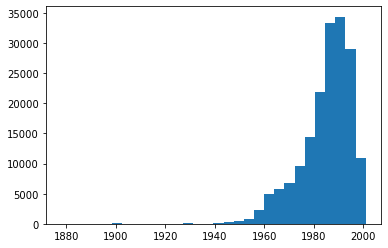

In [565]:
#lets take a look the distribution of user birth year
plt.hist(data= df , x = 'member_birth_year' , bins = 30);

In [566]:
#lets take a look at the year under 1930
df[df.member_birth_year <1930].shape[0]

77

In [567]:
#dropping the year outliers
df=df.drop(df[df.member_birth_year <1930].index)

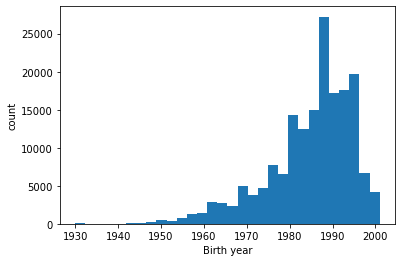

In [568]:
plt.hist(data= df , x = 'member_birth_year' , bins = 30);
plt.xlabel('Birth year');
plt.ylabel('count');

The birth year shows almost unimodel distrubtion skewed to the left and cut off on the year (2001) which i guess is the age limit for the program , the users average birth year is around 1990 with most users lie between ( 1980 , 1999) , there are few outliers on the year 1900 which seems to be data input mistake .

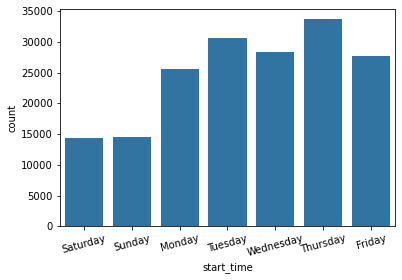

In [440]:
#lets check the average count for each day of the week 
day_name = [ 'Saturday', 'Sunday' ,'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
days = pd.DatetimeIndex(df.start_time).day_name()
ordered_var = pd.api.types.CategoricalDtype( categories = day_name ,ordered = True)
df['day']= days.astype(ordered_var)
sb.countplot( x = days  , order = day_name , color = default_color );
plt.xticks(rotation = 15);

The number of trips taken on the start of the week (sat ,sun) is almost half the number of trips taken on other days. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are outliers with very high trip durations so i transformed the duration scale into log ,It showed that the average trip durations take 5 - 20 mins  and peaks around 10 mins (which make sense for bike trips ) , there are few outliers that lies  above 200 mins  , while checking the birth year there wre few outliers on the year 1900 which seems to be data input mistake , The number of trips taken on the start of the week (sat ,sun) is almost half the number of trips taken on other days.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> after using a log scale transfomeration on duration the most common trip duration was found around 10 mins with some outliers with a very high trip durations  , There were some data points without the gender column so it was neglected for acurate analysis , and as shown in the plot there are a huge gap between the customer and subscriber numbers , and male users are 3 times the number of female useres , the users average birth year is around 1990 with most users lie between ( 1980 , 1999) with  a few outliers at 1900 which  were removed . The number of trips taken on the start of the week (sat ,sun) are much lower than other days of the week.

## Bivariate Exploration

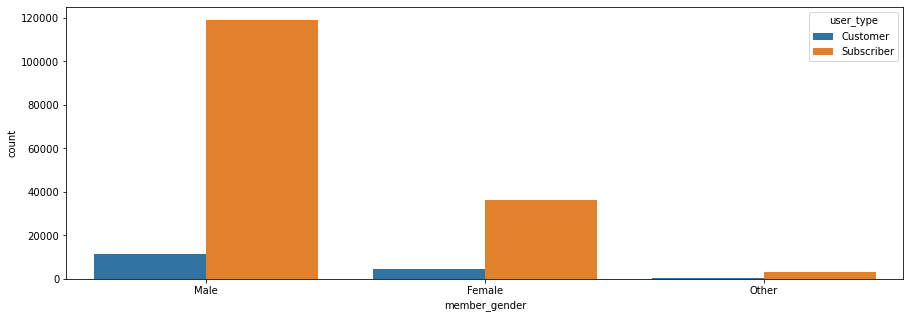

In [569]:
#lets check if the gender affect user type
plt.figure(figsize = [15,5])
sb.countplot(data = df, x = 'member_gender', hue='user_type');

The plot didnt show much difference , suggesting that most of the program users tend to subscribe regarding of there gender.

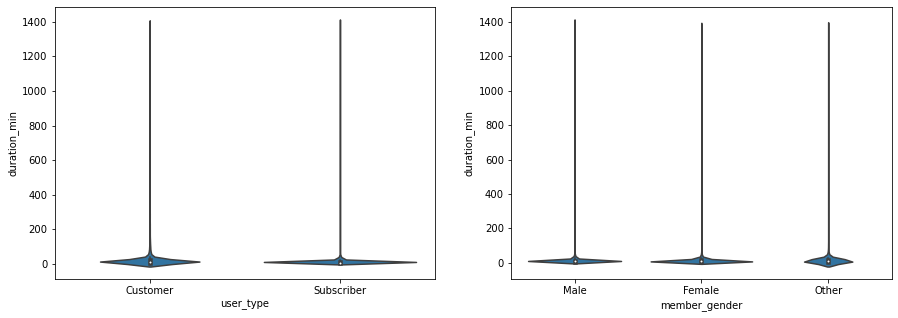

In [570]:
#lets check the average trip duration for each gender and for differnet user types
fig, ax = plt.subplots(ncols = 2, figsize = [15,5])
default_color = sb.color_palette()[0]
# subplot 1: use_type
sb.violinplot(data = df, x = 'user_type' , y='duration_min' , color = default_color, ax = ax[0])

# subplot 2: gender
sb.violinplot(data = df, x = 'member_gender', y='duration_min', color = default_color, ax = ax[1]);

Since the tip duration is highly spread and the vrey high duration outliers is affecting the plots so lets remove the outliers and take the log for the duration column .

In [419]:
# lets check the high duration outliers 
high_outliers = df[df.duration_min > 200]
high_outliers.shape[0]

296

In [420]:
#only 296 with durations above 200 min  , lets remove them for consistency 
df = df.drop( high_outliers.index)

In [421]:
# compute the logof a variable
def log(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df['log_duration'] = df.duration_min .apply(log)



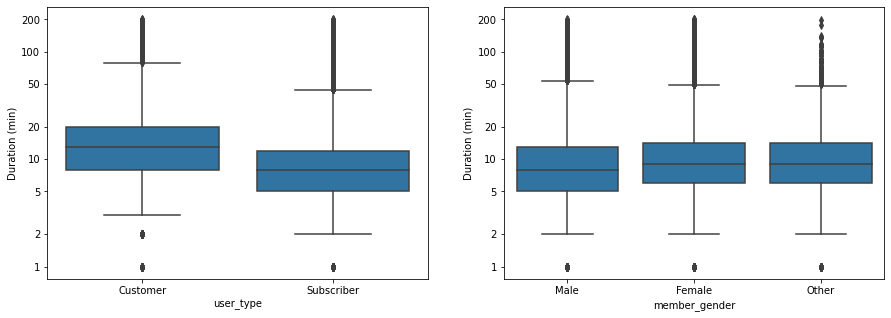

In [519]:
#lets check the average trip duration for each gender and for differnet user types
fig, ax = plt.subplots(ncols = 2, figsize = [15,5])
default_color = sb.color_palette()[0]
# subplot 1: average duration of  use_types 
ax[0].set_yticks(log(np.array([1, 2,5, 10, 20, 50 ,100, 200 ,500 ,1000])))
ax[0].set_yticklabels([1, 2,5, 10, 20, 50 ,100, 200, 500,1000])
sb.boxplot(data = df, x = 'user_type' , y='log_duration' , color = default_color, ax = ax[0] )
ax[0].set_ylabel('Duration (min)')

# subplot 2: average duration of genders
ax[1].set_yticks(log(np.array([1, 2,5, 10, 20, 50 ,100, 200 ,500 ,1000])))
ax[1].set_yticklabels([1, 2,5,10, 20, 50 ,100, 200, 500,1000])
sb.boxplot(data = df, x = 'member_gender', y='log_duration', color = default_color, ax = ax[1]);
ax[1].set_ylabel('Duration (min)');

In [549]:
df.duration_min.groupby(df.member_gender).mean()

member_gender
Male      10.481078
Female    11.907736
Other     12.491034
Name: duration_min, dtype: float64

 - Seems that the average trip durations is not affected by gender as all genders seems to have close average(as shown in the right plot )
 - The plot on the left for the user type on the other hand shows custmors seems to have a slightly higher average trip duration ( ~ 18 mins) than the subscriber's ( ~ 10 min)  .

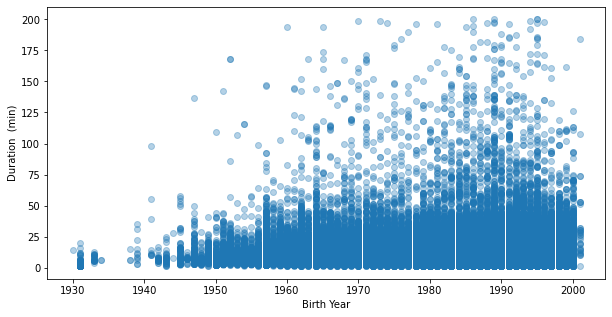

In [520]:
fig, ax = plt.subplots( figsize = [10,5])
plt.scatter(data=df, x='member_birth_year', y='duration_min' , alpha= 1/3 );
plt.ylabel('Duration  (min)');
plt.xlabel('Birth Year');

Seems that the average trip duration ranges for older users are lower than the ranges for younger users , most trips higher than  50 mins is seen from the year range (1965-1995) .

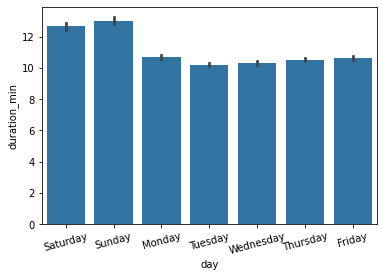

In [521]:
#lets check if there is a relationship between teh average trip duration and the day of the week
sb.barplot(data = df, x = 'day', y ='duration_min' , color = default_color);
plt.xticks(rotation = 15);

In [527]:
df.duration_min.groupby(df.day).mean()

day
Saturday     12.672523
Sunday       13.010770
Monday       10.674743
Tuesday      10.208954
Wednesday    10.314608
Thursday     10.523402
Friday       10.621035
Name: duration_min, dtype: float64

Intersting , even though the count of taken on saturday and sundy was much lower than other days almost by half , it seems that the average trip duration on these two days is slightly higher than other days. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- most of the program users tend to subscribe regarding of there gender.
- Seems that the average trip durations is not affected by gender as all genders seems to have average around 10 mins .
- Custmors seems to have a  higher average trip duration ( ~ 18 mins) than the subscriber's ( ~ 10 min) (which make sense, since customers would pay for every trip indivdually , so they tend to use the program mostly for the longer trips ) .

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Seems that the trip duration ranges for older users are lower than the ranges for younger users , most frequency of trips higher than 50 mins is seen from the year range (1965-1995) .
- Interstingly , even though the count of taken on saturday and sundy was much lower than other days almost by half , it seems that the average trip duration on these two days is slightly higher than other days. 

## Multivariate Exploration

Lets dive deepr and see how mutlplie variables will affect the trip duration 

In [477]:
#checking the average trip duration for female customers and subscirbers
female_users = df[ df.member_gender == 'Female'].groupby('user_type')
female_users.duration_min.mean()

user_type
Customer      19.787280
Subscriber    10.903141
Name: duration_min, dtype: float64

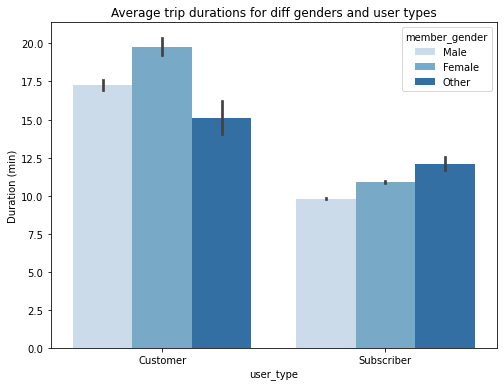

In [544]:
#lets plot the diff average durations for customers and subscribers while showing there gender 
fig = plt.figure(figsize = [8,6])
ax = sb.barplot(data = df, x = 'user_type', y = 'duration_min', hue = 'member_gender',
           palette = 'Blues' );
plt.title('Average trip durations for diff genders and user types');
plt.ylabel("Duration (min)");

This plot confrims the finding from the bivariate plot which is the customers tend to have higher average trip durations , but interestingly this plot shows that the female customers have the highest average overall (~20 mins) ,  while the male subscribers have the lowest average overall (~10 mins).

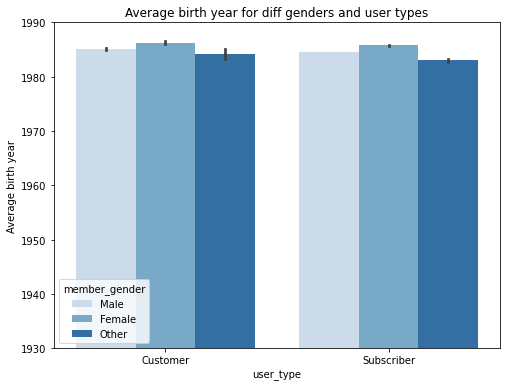

In [538]:
#checking the age of diff genders and diff user types
fig = plt.figure(figsize = [8,6])
ax = sb.barplot(data = df, x = 'user_type', y = 'member_birth_year', hue = 'member_gender',
           palette = 'Blues' );
plt.ylim(1930 , 1990);
plt.title('Average birth year for diff genders and user types');
plt.ylabel("Average birth year");

The plot shows almost no difference in age regarding the gender or the user type 

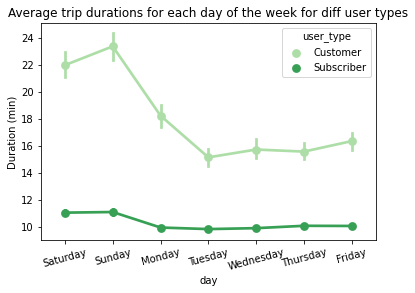

In [543]:
sb.pointplot(data = df, x = 'day', y ='duration_min' , color = default_color ,hue = 'user_type' , palette = 'Greens' );
plt.xticks(rotation = 15);
plt.title('Average trip durations for each day of the week for diff user types');
plt.ylabel("Duration (min)");

As the prevoius analysis suggets customer tend to have higher trip duration average overall , but this plot shows that while the average of subscribers is almost the same regardless of the day  , customers's average spike on the beginning  of the week at sunday. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- while looking for the average durations for customers and subscribers it showed that the customers have higher average , this with confirmed in each of the bivariate and variate exploration.
- In the bivariate exploration while looking at the effect of gender on trip duration not much difference was present,but during the multivariate exploration of duration against type and gender , it showed that female customers have the highest average overall (~20 mins) ,  while the male subscribers have the lowest average overall (~10 mins). 
- Seems that the average trip duration ranges for older users are lower than the ranges for younger users , most trips higher than 50 mins is seen from the year range (1965-1995) , but there were not much difference on teh average age of diffrent user types or genders. 


### Were there any interesting or surprising interactions between features?

- Even though saturday and sunday had the lowest count of all days almost by half , these two day had the higher average trip durations .
- After checking the average durations of custmors and subscribers against differnet days of the week , while subscribers maintaned a monotonic behaviour , the customers's average were much higher early week specially on sundys.